In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from datetime import datetime, timedelta

# Cleaning

In [31]:
df = pd.read_csv('kindle_data-v2.csv')

In [3]:
df.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [5]:
df['isGoodReadsChoice'].sum()

1402

In [6]:
df['category_name'].unique()

array(['Parenting & Relationships', 'Engineering & Transportation',
       'Science & Math', 'Mystery, Thriller & Suspense',
       'Crafts, Hobbies & Home', 'Literature & Fiction',
       'Biographies & Memoirs', 'Computers & Technology',
       'Politics & Social Sciences', 'Teen & Young Adult',
       'Foreign Language', 'Science Fiction & Fantasy', 'Travel',
       'LGBTQ+ eBooks', 'Religion & Spirituality', 'Arts & Photo graphy',
       'Comics', 'Education & Teaching', 'History',
       'Cookbooks, Food & Wine', 'Nonfiction', 'Self-Help', 'Romance',
       'Humor & Entertainment', 'Reference', 'Health, Fitness & Dieting',
       'Sports & Outdoors', 'Medical', 'Business & Money', 'Law',
       "Children's eBooks"], dtype=object)

In [7]:
df.groupby('reviews')['reviews'].count()

reviews
0         64670
1           695
2           515
3           458
4           421
          ...  
242575        1
272608        1
289251        1
296710        1
618227        1
Name: reviews, Length: 8441, dtype: int64

In [8]:
df['isBestSeller'].sum()

2236

In [19]:
type(df['publishedDate'][0])

str

In [202]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'])

In [27]:
df['publishedDate'].dt.month

0          6.0
1          2.0
2          9.0
3          2.0
4          5.0
          ... 
133097     9.0
133098     9.0
133099     9.0
133100     8.0
133101    10.0
Name: publishedDate, Length: 133102, dtype: float64

In [34]:
df[ (df['reviews'] == 0) & (df['isGoodReadsChoice']==True)]

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name
33,B017RNBS3A,It Ends With Us: The emotional #1 Sunday Times...,Colleen Hoover,NaN,https://m.media-amazon.com/images/I/817vqET828...,https://www.amazon.com/dp/B017RNBS3A,4.7,0,0.00,False,6,False,False,True,2016-08-02,Parenting & Relationships
103,B08J1Q5W6X,How Y'all Doing?: Misadventures and Mischief f...,Leslie Jordan,HarperCollins Publishers,https://m.media-amazon.com/images/I/71cUnAghU6...,https://www.amazon.com/dp/B08J1Q5W6X,4.7,0,13.99,False,6,False,False,True,2021-04-27,Parenting & Relationships
138,B00L9AY254,NeuroTribes: The Legacy of Autism and the Futu...,Steve Silberman,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/81M63xgtmX...,https://www.amazon.com/dp/B00L9AY254,4.7,0,9.99,False,6,False,False,True,2015-08-25,Parenting & Relationships
153,B088Q9X35M,Finding Freedom: A Cook's Story; Remaking a Li...,Erin French,Macmillan,https://m.media-amazon.com/images/I/81pxl47PSD...,https://www.amazon.com/dp/B088Q9X35M,4.6,0,2.99,False,6,False,False,True,2021-04-06,Parenting & Relationships
235,B07Q4LSNVB,Before and After: The Incredible Real-Life Sto...,Judy Christie,Random House LLC,https://m.media-amazon.com/images/I/91qRMS2FHs...,https://www.amazon.com/dp/B07Q4LSNVB,4.5,0,9.99,False,6,False,False,True,2019-10-22,Parenting & Relationships
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132626,1616550546,"Avatar: The Last Airbender: The Search, Part 1",Gene Luen Yang,NaN,https://m.media-amazon.com/images/I/91oI77sQQV...,https://www.amazon.com/dp/1616550546,4.8,0,8.58,False,25,False,False,True,2013-03-19,Children's eBooks
132759,0061961108,"The Familiars (Familiars, 1)",Adam Jay Epstein,NaN,https://m.media-amazon.com/images/I/91QkwOAKC2...,https://www.amazon.com/dp/0061961108,4.7,0,9.99,False,25,False,False,True,2011-06-07,Children's eBooks
132947,1452126992,I Wish You More,Amy Krouse Rosenthal,NaN,https://m.media-amazon.com/images/I/911aSe-+Oe...,https://www.amazon.com/dp/1452126992,4.8,0,7.83,True,25,False,False,True,2015-03-31,Children's eBooks
132955,B00A7G7IQQ,Trust No One: The 39 Clues: Cahills vs. Vesper...,Linda Sue Park,NaN,https://m.media-amazon.com/images/I/9117tZgU7g...,https://www.amazon.com/dp/B00A7G7IQQ,4.7,0,0.00,False,25,False,False,True,NaN,Children's eBooks


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133102 entries, 0 to 133101
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   asin               133102 non-null  object 
 1   title              133102 non-null  object 
 2   author             132677 non-null  object 
 3   soldBy             123869 non-null  object 
 4   imgUrl             133102 non-null  object 
 5   productURL         133102 non-null  object 
 6   stars              133102 non-null  float64
 7   reviews            133102 non-null  int64  
 8   price              133102 non-null  float64
 9   isKindleUnlimited  133102 non-null  bool   
 10  category_id        133102 non-null  int64  
 11  isBestSeller       133102 non-null  bool   
 12  isEditorsPick      133102 non-null  bool   
 13  isGoodReadsChoice  133102 non-null  bool   
 14  publishedDate      84086 non-null   object 
 15  category_name      133102 non-null  object 
dtypes:

In [28]:
df.describe()

,stars,reviews,price,category_id
count,133102.000000,133102.000000,133102.000000,133102.000000
mean,4.404090,887.375779,15.134127,16.287111
std,0.745646,5104.878777,22.254986,8.416924
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,4.990000,9.000000
50%,4.500000,4.000000,9.990000,16.000000
75%,4.700000,365.000000,14.990000,23.000000
max,5.000000,618227.000000,682.000000,31.000000


In [38]:
df[ df['isBestSeller'] == True].describe()

,stars,reviews,price,category_id
count,2236.000000,2236.000000,2236.000000,2236.000000
mean,4.491995,1699.806798,7.681248,16.025045
std,0.366376,6951.964084,6.264738,8.527272
min,0.000000,0.000000,0.000000,1.000000
25%,4.400000,0.000000,2.990000,9.000000
50%,4.500000,30.000000,5.990000,16.000000
75%,4.700000,687.250000,9.990000,24.000000
max,5.000000,140043.000000,66.000000,31.000000


In [39]:
df[ df['isGoodReadsChoice'] == True].describe()

,stars,reviews,price,category_id
count,1402.000000,1402.000000,1402.000000,1402.00000
mean,4.511626,7585.153352,9.712682,15.53495
std,0.195087,19317.844509,4.466948,7.63341
min,3.600000,0.000000,0.000000,1.00000
25%,4.400000,0.000000,7.990000,9.00000
50%,4.500000,1534.000000,9.990000,16.00000
75%,4.700000,6994.500000,12.990000,21.00000
max,4.900000,296710.000000,28.690000,31.00000


In [40]:
df[ df['isKindleUnlimited'] == True].describe()

,stars,reviews,price,category_id
count,35815.000000,35815.000000,35815.000000,35815.000000
mean,4.397526,1048.003686,5.956023,17.475834
std,0.641110,4546.930237,3.955515,8.588186
min,0.000000,0.000000,0.000000,1.000000
25%,4.300000,0.000000,3.990000,10.000000
50%,4.500000,42.000000,4.990000,19.000000
75%,4.600000,711.000000,6.990000,25.000000
max,5.000000,242575.000000,150.000000,31.000000


In [41]:
df[ df['isEditorsPick'] == True].describe()

,stars,reviews,price,category_id
count,5621.000000,5621.000000,5621.000000,5621.000000
mean,4.460612,4195.072407,11.238216,15.245152
std,0.250359,17255.379697,4.787545,7.230449
min,0.000000,0.000000,0.000000,1.000000
25%,4.300000,0.000000,9.000000,9.000000
50%,4.500000,146.000000,11.990000,16.000000
75%,4.600000,2148.000000,13.990000,21.000000
max,5.000000,618227.000000,105.990000,31.000000


In [45]:
df.groupby('category_name')['category_name'].count().sort_values(ascending = False)

category_name
Mystery, Thriller & Suspense    6272
Engineering & Transportation    6162
Science & Math                  5955
Parenting & Relationships       5901
Children's eBooks               5747
Teen & Young Adult              5738
Foreign Language                5724
Travel                          5526
LGBTQ+ eBooks                   5517
Computers & Technology          5504
Crafts, Hobbies & Home          5502
Biographies & Memoirs           5405
Cookbooks, Food & Wine          5333
Law                             5027
Education & Teaching            4986
Religion & Spirituality         4970
Arts & Photo graphy             4916
Politics & Social Sciences      4207
Literature & Fiction            4152
Humor & Entertainment           4095
Science Fiction & Fantasy       3995
Self-Help                       3493
Reference                       3388
Sports & Outdoors               3206
Medical                         2583
Business & Money                2577
Romance                 

In [55]:
df[ df['isKindleUnlimited'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(10)

category_name
LGBTQ+ eBooks                   3906
Mystery, Thriller & Suspense    3077
Teen & Young Adult              2482
Science Fiction & Fantasy       2372
Literature & Fiction            2353
Humor & Entertainment           1891
Religion & Spirituality         1688
Romance                         1647
Cookbooks, Food & Wine          1578
Crafts, Hobbies & Home          1500
Name: category_name, dtype: int64

In [56]:
df[ df['isBestSeller'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(10)

category_name
Literature & Fiction            186
Science & Math                  185
Children's eBooks               152
Teen & Young Adult              148
Biographies & Memoirs           137
Religion & Spirituality         129
Politics & Social Sciences      113
Mystery, Thriller & Suspense    109
Travel                           99
Crafts, Hobbies & Home           96
Name: category_name, dtype: int64

In [52]:
df[ df['isGoodReadsChoice'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(5)

category_name
Teen & Young Adult              245
Literature & Fiction            170
Children's eBooks               152
Biographies & Memoirs           144
Mystery, Thriller & Suspense    124
Name: category_name, dtype: int64

In [51]:
df[ df['isEditorsPick'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(5)

category_name
Biographies & Memoirs           844
Mystery, Thriller & Suspense    803
Cookbooks, Food & Wine          634
Literature & Fiction            490
Teen & Young Adult              386
Name: category_name, dtype: int64

# Analysis

# Best release window

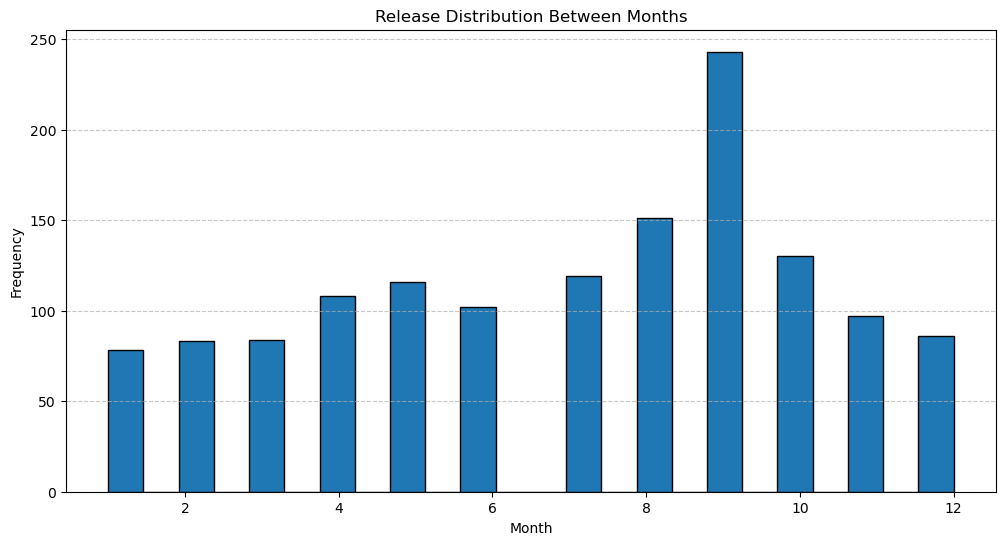

In [332]:
plt.figure(figsize=(12, 6))
plt.hist(df3['month'], bins=24, range=(1, 12), edgecolor='black')


plt.title('Release Distribution Between Months')
plt.xlabel('Month')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.7)

### the best release window for a book to make the best sellers list is between August and Octomber

# top 10 most popular categories in Best Sellers lists

In [143]:
#df.groupby('category_name')['category_name'].count().sort_values(ascending = False).head(10)

In [135]:
#df[ df['isBestSeller'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(10).plot.bar(ylabel='number of books in Best Sellers list')
#plt.xticks(fontsize=10, fontweight='bold')
#plt.title('Most Popular Categories in Best Sellers list')

In [137]:
df_cat = df[ df['isBestSeller'] == True].groupby('category_name')['category_name'].count().sort_values(ascending = False).head(10)

In [138]:
df_cat

category_name
Literature & Fiction            186
Science & Math                  185
Children's eBooks               152
Teen & Young Adult              148
Biographies & Memoirs           137
Religion & Spirituality         129
Politics & Social Sciences      113
Mystery, Thriller & Suspense    109
Travel                           99
Crafts, Hobbies & Home           96
Name: category_name, dtype: int64

In [139]:
df_cat = pd.DataFrame(df_cat)

In [140]:
df_cat

,category_name
category_name,
Literature & Fiction,186
Science & Math,185
Children's eBooks,152
Teen & Young Adult,148
Biographies & Memoirs,137
Religion & Spirituality,129
Politics & Social Sciences,113
"Mystery, Thriller & Suspense",109
Travel,99


Text(0.5, 1.0, 'Most Popular Categories in Best Sellers list')

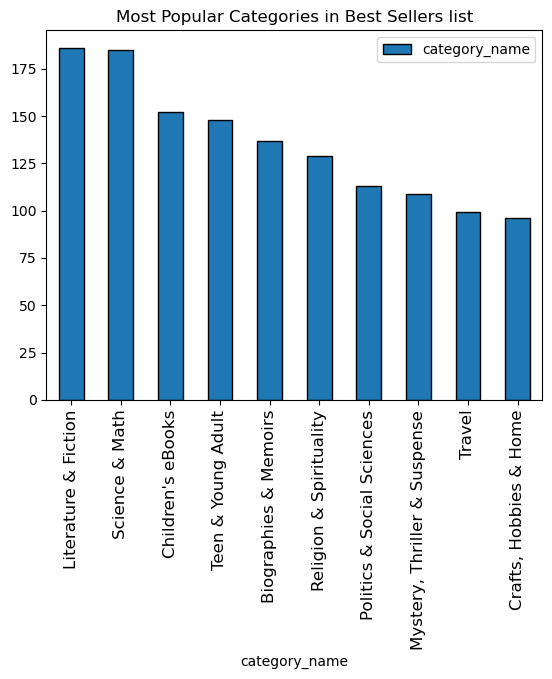

In [165]:
df_cat.plot.bar(edgecolor='black')
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.title('Most Popular Categories in Best Sellers list')

## if you want your book to achive Best Seller status you should aim for one of the following categories:
### Literature & Fiction
### Science & Math
### Children's eBooks
### Teen & Young Adult
### Biographies & Memoirs
### Religion & Spirituality
### Politics & Social Sciences
### Mystery, Thriller & Suspense
### Travel
### Crafts, Hobbies & Home

# Pricing strategy

In [144]:
df_best = df[ df['isBestSeller'] == True]

In [170]:
df_best.shape

(2236, 16)

In [152]:
pd.DataFrame(df_best['price'].describe())

,price
count,2236.000000
mean,7.681248
std,6.264738
min,0.000000
25%,2.990000
50%,5.990000
75%,9.990000
max,66.000000


In [150]:
pd.DataFrame(df['price'].describe())

,price
count,133102.000000
mean,15.134127
std,22.254986
min,0.000000
25%,4.990000
50%,9.990000
75%,14.990000
max,682.000000


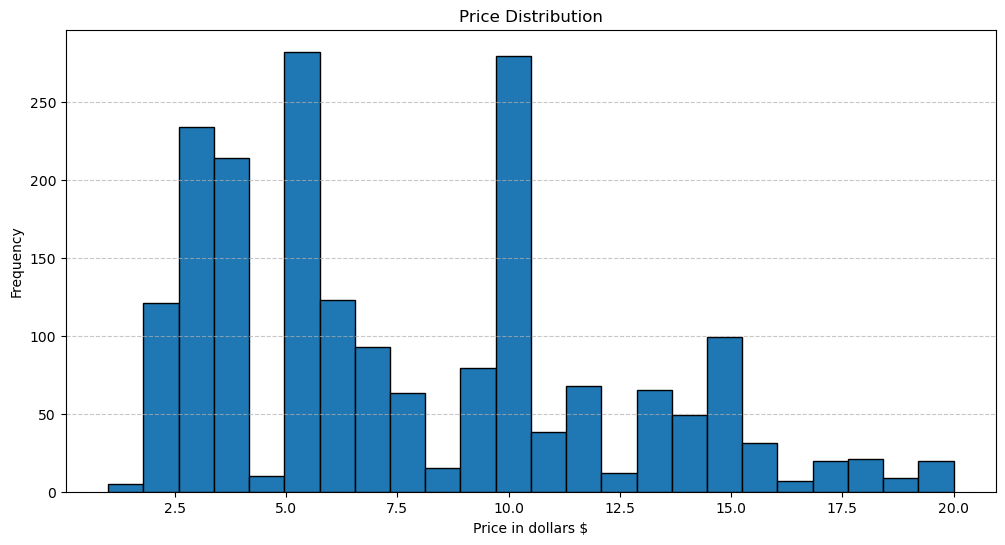

In [160]:
plt.figure(figsize=(12, 6))
plt.hist(df_best['price'], bins=24, range=(1,20), edgecolor='black')


plt.title('Price Distribution')
plt.xlabel('Price in dollars $')
plt.ylabel('Frequency')

plt.grid(axis='y', linestyle='--', alpha=0.7)

### Books found in the Best Sellers lists are most frequently priced between 3 and 10 dollars

# correlation between labels (BestSeller, Kindle etc)|

In [187]:
corr_1 = df['isBestSeller'].corr(df['isKindleUnlimited'])

In [188]:
print(corr_1)

0.11380373781894995


In [191]:
corr_2 = df['isBestSeller'].corr(df['isGoodReadsChoice'])

In [192]:
print(corr_2)

-0.013486635027385382


In [193]:
corr_3 = df['isBestSeller'].corr(df['isEditorsPick'])

In [325]:
print(corr_3)

-0.027447737232782536


### there is no significant correlation between labels

# Book categories in the Best Seller lists and their popularity over the years

In [206]:
df2 = df.copy()

In [207]:
df2['year'] = df['publishedDate'].dt.year

In [208]:
df2['month'] = df['publishedDate'].dt.month

In [214]:
df2.head()

,asin,title,author,soldBy,imgUrl,productURL,stars,reviews,price,isKindleUnlimited,category_id,isBestSeller,isEditorsPick,isGoodReadsChoice,publishedDate,category_name,year,month
0,B00TZE87S4,Adult Children of Emotionally Immature Parents...,Lindsay C. Gibson,Amazon.com Services LLC,https://m.media-amazon.com/images/I/713KZTsaYp...,https://www.amazon.com/dp/B00TZE87S4,4.8,0,9.99,False,6,True,False,False,2015-06-01,Parenting & Relationships,2015.0,6.0
1,B08WCKY8MB,"From Strength to Strength: Finding Success, Ha...",Arthur C. Brooks,Penguin Group (USA) LLC,https://m.media-amazon.com/images/I/A1LZcJFs9E...,https://www.amazon.com/dp/B08WCKY8MB,4.4,0,16.99,False,6,False,False,False,2022-02-15,Parenting & Relationships,2022.0,2.0
2,B09KPS84CJ,Good Inside: A Guide to Becoming the Parent Yo...,Becky Kennedy,HarperCollins Publishers,https://m.media-amazon.com/images/I/71RIWM0sv6...,https://www.amazon.com/dp/B09KPS84CJ,4.8,0,16.99,False,6,False,True,False,2022-09-13,Parenting & Relationships,2022.0,9.0
3,B07S7QPG6J,Everything I Know About Love: A Memoir,Dolly Alderton,HarperCollins Publishers,https://m.media-amazon.com/images/I/71QdQpTiKZ...,https://www.amazon.com/dp/B07S7QPG6J,4.2,0,9.95,True,6,False,True,False,2020-02-25,Parenting & Relationships,2020.0,2.0
4,B00N6PEQV0,The Seven Principles for Making Marriage Work:...,John Gottman,Random House LLC,https://m.media-amazon.com/images/I/813o4WOs+w...,https://www.amazon.com/dp/B00N6PEQV0,4.7,0,13.99,False,6,False,False,False,2015-05-05,Parenting & Relationships,2015.0,5.0


In [236]:
df2[ df2[ 'isBestSeller'] == True ].groupby('year')['year'].count()

year
1979.0      1
1984.0      1
1993.0      1
1996.0      1
1997.0      1
1998.0      2
1999.0      1
2000.0      2
2001.0      2
2002.0      2
2003.0      2
2004.0      3
2005.0      4
2006.0      6
2007.0     13
2008.0      9
2009.0     21
2010.0     12
2011.0     30
2012.0     32
2013.0     37
2014.0     39
2015.0     48
2016.0     42
2017.0     55
2018.0    105
2019.0     85
2020.0    102
2021.0    144
2022.0    208
2023.0    386
Name: year, dtype: int64

In [218]:
df2[ (df2['isBestSeller'] == True) & (df2['year']==2023) ].groupby('category_name')['category_name'].count().sort_values(ascending=False).head(10)

category_name
Biographies & Memoirs           38
Literature & Fiction            35
Religion & Spirituality         29
Science & Math                  28
Politics & Social Sciences      26
Children's eBooks               23
Business & Money                20
Mystery, Thriller & Suspense    18
Cookbooks, Food & Wine          17
Crafts, Hobbies & Home          13
Name: category_name, dtype: int64

In [219]:
df2[ (df2['isBestSeller'] == True) & (df2['year']==2022) ].groupby('category_name')['category_name'].count().sort_values(ascending=False).head(10)

category_name
Travel                        28
Science & Math                23
Children's eBooks             17
Religion & Spirituality       14
Politics & Social Sciences    13
Crafts, Hobbies & Home        10
Literature & Fiction           9
Computers & Technology         9
Reference                      8
Parenting & Relationships      8
Name: category_name, dtype: int64

In [220]:
df2[ (df2['isBestSeller'] == True) & (df2['year']==2021) ].groupby('category_name')['category_name'].count().sort_values(ascending=False).head(10)

category_name
Science & Math                  20
Crafts, Hobbies & Home          19
Children's eBooks               12
Travel                          10
Biographies & Memoirs           10
Cookbooks, Food & Wine           9
Parenting & Relationships        8
Computers & Technology           6
Engineering & Transportation     6
Politics & Social Sciences       5
Name: category_name, dtype: int64

In [221]:
df2[ (df2['isBestSeller'] == True) & (df2['year']==2020) ].groupby('category_name')['category_name'].count().sort_values(ascending=False).head(10)

category_name
Science & Math                  16
Children's eBooks                8
Religion & Spirituality          8
Biographies & Memoirs            8
Crafts, Hobbies & Home           6
Engineering & Transportation     5
Teen & Young Adult               5
Business & Money                 5
Law                              4
Travel                           4
Name: category_name, dtype: int64

In [222]:
df2[ (df2['isBestSeller'] == True) & (df2['year']==2019) ].groupby('category_name')['category_name'].count().sort_values(ascending=False).head(10)

category_name
Children's eBooks             10
Science & Math                10
Business & Money               6
Politics & Social Sciences     6
Cookbooks, Food & Wine         5
Crafts, Hobbies & Home         5
Biographies & Memoirs          4
Nonfiction                     4
Arts & Photo graphy            3
Medical                        3
Name: category_name, dtype: int64

In [223]:
df3 = df2[ df2[ 'isBestSeller'] == True ]

In [246]:
list(df3[df3['year']==2023].shape)[0]

386

In [257]:
year_2023 = (df3[df3['year']==2023].groupby('category_name')['category_name'].count())/(list(df3[df3['year']==2023].shape)[0])*100

In [259]:
year_2022 = (df3[df3['year']==2022].groupby('category_name')['category_name'].count())/(list(df3[df3['year']==2022].shape)[0])*100

In [260]:
year_2021 = (df3[df3['year']==2021].groupby('category_name')['category_name'].count())/(list(df3[df3['year']==2021].shape)[0])*100

In [261]:
year_2020 = (df3[df3['year']==2020].groupby('category_name')['category_name'].count())/(list(df3[df3['year']==2020].shape)[0])*100

In [262]:
year_2019 = (df3[df3['year']==2019].groupby('category_name')['category_name'].count())/(list(df3[df3['year']==2019].shape)[0])*100

In [263]:
year_2023

category_name
Arts & Photo graphy             2.849741
Biographies & Memoirs           9.844560
Business & Money                5.181347
Children's eBooks               5.958549
Computers & Technology          3.108808
Cookbooks, Food & Wine          4.404145
Crafts, Hobbies & Home          3.367876
Education & Teaching            2.590674
Engineering & Transportation    1.813472
Foreign Language                0.259067
Health, Fitness & Dieting       3.108808
History                         2.590674
Humor & Entertainment           1.554404
LGBTQ+ eBooks                   1.813472
Law                             0.518135
Literature & Fiction            9.067358
Medical                         0.518135
Mystery, Thriller & Suspense    4.663212
Nonfiction                      3.367876
Parenting & Relationships       1.554404
Politics & Social Sciences      6.735751
Reference                       1.813472
Religion & Spirituality         7.512953
Romance                         0.518135
Sc

In [374]:
data = pd.concat([year_2019, year_2020,year_2021,year_2022,year_2023], axis=1)

In [375]:
data.columns=['2019', '2020','2021','2022','2023']

In [376]:
#data = data.reset_index()

In [393]:
data

,2019,2020,2021,2022,2023
category_name,,,,,
Arts & Photo graphy,3.529412,1.960784,2.777778,3.846154,2.849741
Biographies & Memoirs,4.705882,7.843137,6.944444,2.884615,9.844560
Business & Money,7.058824,4.901961,2.777778,2.403846,5.181347
Children's eBooks,11.764706,7.843137,8.333333,8.173077,5.958549
Computers & Technology,3.529412,2.941176,4.166667,4.326923,3.108808
"Cookbooks, Food & Wine",5.882353,2.941176,6.250000,3.846154,4.404145
"Crafts, Hobbies & Home",5.882353,5.882353,13.194444,4.807692,3.367876
Education & Teaching,1.176471,3.921569,2.083333,2.884615,2.590674
Engineering & Transportation,3.529412,4.901961,4.166667,2.884615,1.813472


In [378]:
df_t = data.transpose()

In [379]:
df_t.head()

category_name,Arts & Photo graphy,Biographies & Memoirs,Business & Money,Children's eBooks,Computers & Technology,"Cookbooks, Food & Wine","Crafts, Hobbies & Home",Education & Teaching,Engineering & Transportation,"Health, Fitness & Dieting",History,Humor & Entertainment,Literature & Fiction,Medical,"Mystery, Thriller & Suspense",Nonfiction,Parenting & Relationships,Politics & Social Sciences,Reference,Religion & Spirituality,Science & Math,Self-Help,Teen & Young Adult,Travel,Law,Romance,Sports & Outdoors,Foreign Language,LGBTQ+ eBooks,Science Fiction & Fantasy
2019,3.529412,4.705882,7.058824,11.764706,3.529412,5.882353,5.882353,1.176471,3.529412,3.529412,3.529412,1.176471,3.529412,3.529412,2.352941,4.705882,2.352941,7.058824,1.176471,2.352941,11.764706,1.176471,2.352941,2.352941,NaN,NaN,NaN,NaN,NaN,NaN
2020,1.960784,7.843137,4.901961,7.843137,2.941176,2.941176,5.882353,3.921569,4.901961,1.960784,1.960784,NaN,0.980392,0.980392,0.980392,1.960784,2.941176,2.941176,2.941176,7.843137,15.686275,1.960784,4.901961,3.921569,3.921569,0.980392,NaN,NaN,NaN,NaN
2021,2.777778,6.944444,2.777778,8.333333,4.166667,6.250000,13.194444,2.083333,4.166667,2.083333,0.694444,0.694444,2.777778,0.694444,2.083333,0.694444,5.555556,3.472222,1.388889,2.777778,13.888889,0.694444,2.777778,6.944444,1.388889,NaN,0.694444,NaN,NaN,NaN
2022,3.846154,2.884615,2.403846,8.173077,4.326923,3.846154,4.807692,2.884615,2.884615,2.403846,1.923077,2.403846,4.326923,0.961538,1.442308,0.961538,3.846154,6.250000,3.846154,6.730769,11.057692,0.961538,2.403846,13.461538,0.961538,NaN,NaN,NaN,NaN,NaN
2023,2.849741,9.844560,5.181347,5.958549,3.108808,4.404145,3.367876,2.590674,1.813472,3.108808,2.590674,1.554404,9.067358,0.518135,4.663212,3.367876,1.554404,6.735751,1.813472,7.512953,7.253886,2.590674,2.849741,1.554404,0.518135,0.518135,0.259067,0.259067,1.813472,0.777202


<Axes: >

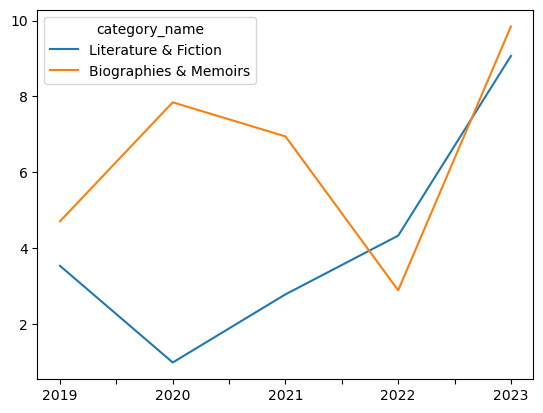

In [392]:
df_t[["Literature & Fiction",'Biographies & Memoirs']].plot()

### "Literature & Fiction" and "Biographies & Memoirs" categories seem to follow an upward trend

<Axes: >

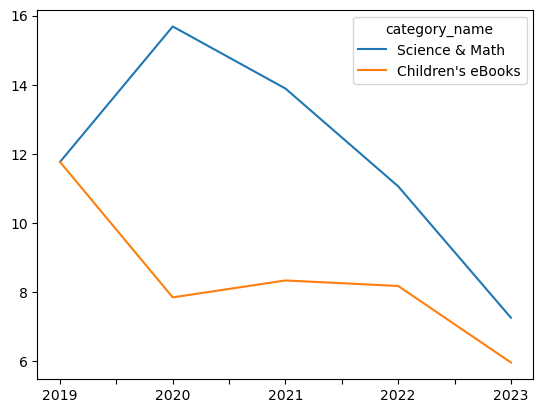

In [394]:
df_t[["Science & Math","Children's eBooks"]].plot()

### "Science & Math" and "Children's eBooks" categories seem to follow a downward trend

# ---------------------------------------------------------------------------------------------------------
# THE END